### 搭建生成对抗网络，本实验使用生成对抗网络模型拟合一条一元二次方程曲线，通过生成器和鉴别器的博弈来产生逼真一元二次曲线。
## 算法流程：
### 1. 数据准备；定义真实数据集提供器和加入随机噪声的数据集提供器。（√）
### 2. 算法配置；定义生成器 G，定义判别器 D，定义训练和迭代方式。（√）
### 3. 模型训练与预测；更新并迭代生成器和判别器的参数。最后进行图片和可视化展示。（√）

### 加分项：使用 python 面向对象的方式对 GAN 的结构进行封装。（√）
### 复现的内容使用 torch 或其他框架也加分（√）

In [1]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
%matplotlib inline



Using TensorFlow backend.


### 封装

In [2]:
class my_gan():
    def __init__(self,latent_dim,n_inputs=2,n_outputs=2,n_epochs=10000, n_batch=128, n_eval=2000):
        # 定义判别器
        self.discriminator = Sequential()
        self.discriminator.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
        self.discriminator.add(Dense(1, activation='sigmoid'))
        self.discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        self.generator = Sequential()
        self.generator.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
        self.generator.add(Dense(n_outputs, activation='linear'))
       
        
        # 判别器训练关了
        self.discriminator.trainable = False
        
        # gan的网络结构
        self.model = Sequential()
        # 生成器
        self.model.add(self.generator)
        # 判别器
        self.model.add(self.discriminator)
        # 最好适用adam，稳定
        self.model.compile(loss='binary_crossentropy', optimizer='adam')
        self.latent_dim=latent_dim
        self.n_inputs=n_inputs
        self.n_outputs=n_outputs
        self.n_epochs=n_epochs
        self.n_batch=n_batch
        self.n_eval=n_eval

    # 真数据集
    def generate_real_samples(self,n):
        # 数据范围
        X1 = rand(n) - 0.5
        # X^2
        X2 = X1 * X1
        # 保证向量结构一致
        X1 = X1.reshape(n, 1)
        X2 = X2.reshape(n, 1)
        X = hstack((X1, X2))
        # 贴真标签
        y = ones((n, 1))
        return X, y
    
    # 隐点
    def generate_latent_points(self,latent_dim, n):
        # 
        x_input = randn(latent_dim * n)
        # 改结构
        x_input = x_input.reshape(n, latent_dim)
        return x_input

    # 假数据集
    def generate_fake_samples(self,generator, latent_dim, n):
        # 得到数据点
        x_input = self.generate_latent_points(latent_dim, n)
        # 预测结果
        X = self.generator.predict(x_input)
        # 贴标签（假）
        y = zeros((n, 1))
        return X, y

    # 图像和评估
    def summarize_performance(self,epoch, generator, discriminator, latent_dim, n=100):
        # 真数据
        x_real, y_real = self.generate_real_samples(n)
        # 判别器对真数据的结果
        _, acc_real = self.discriminator.evaluate(x_real, y_real, verbose=0)
        # 假数据
        x_fake, y_fake = self.generate_fake_samples(generator, latent_dim, n)
        # 判别器对假数据的结果
        _, acc_fake = self.discriminator.evaluate(x_fake, y_fake, verbose=0)
        # 输出结果
        print(epoch, acc_real, acc_fake)
        # scatter plot real and fake data points
        if(epoch%500==0):
            pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
            pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
            pyplot.savefig('r1\image_at_epoch_{:04d}.png'.format(epoch))
            pyplot.show()

        
    def train(self):
        # batch的一半用来更新盘背鳍
        half_batch = int(self.n_batch / 2)
       # print(self.latent_dim)
        for i in range(int(self.n_epochs)):
            # 真数据
            x_real, y_real = self.generate_real_samples(half_batch)
            # 假数据
            x_fake, y_fake = self.generate_fake_samples(self.generator, self.latent_dim, half_batch)
            # 判别器train
            self.discriminator.train_on_batch(x_real, y_real)
            self.discriminator.train_on_batch(x_fake, y_fake)
            # 生成器的数据
            x_gan = self.generate_latent_points(self.latent_dim, self.n_batch)
            # 贴标签（真）
            y_gan = ones((self.n_batch, 1))
            # 生成器的train
            self.model.train_on_batch(x_gan, y_gan)
            # 图像等
            self.summarize_performance(i, self.generator, self.discriminator, self.latent_dim)        
                



In [3]:
gan=my_gan(latent_dim=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\29459\anaconda3\envs\python37\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 0.17000000178813934 0.7699999809265137


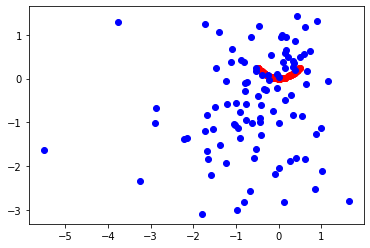

1 0.07999999821186066 0.8299999833106995
2 0.14000000059604645 0.7599999904632568
3 0.15000000596046448 0.7400000095367432
4 0.17000000178813934 0.8199999928474426
5 0.1599999964237213 0.7300000190734863
6 0.17000000178813934 0.75
7 0.14000000059604645 0.7599999904632568
8 0.15000000596046448 0.800000011920929
9 0.14000000059604645 0.7699999809265137
10 0.1899999976158142 0.7900000214576721
11 0.17000000178813934 0.699999988079071
12 0.10000000149011612 0.7599999904632568
13 0.15000000596046448 0.6800000071525574
14 0.09000000357627869 0.699999988079071
15 0.14000000059604645 0.7799999713897705
16 0.11999999731779099 0.6899999976158142
17 0.10999999940395355 0.7599999904632568
18 0.05000000074505806 0.75
19 0.14000000059604645 0.7599999904632568
20 0.11999999731779099 0.7400000095367432
21 0.12999999523162842 0.7799999713897705
22 0.11999999731779099 0.800000011920929
23 0.05999999865889549 0.6299999952316284
24 0.07000000029802322 0.699999988079071
25 0.10999999940395355 0.69999998807

199 0.4000000059604645 0.8899999856948853
200 0.3700000047683716 0.8500000238418579
201 0.3499999940395355 0.8700000047683716
202 0.36000001430511475 0.7900000214576721
203 0.36000001430511475 0.8299999833106995
204 0.38999998569488525 0.8700000047683716
205 0.3799999952316284 0.7900000214576721
206 0.3100000023841858 0.8500000238418579
207 0.3400000035762787 0.8199999928474426
208 0.49000000953674316 0.800000011920929
209 0.3799999952316284 0.8100000023841858
210 0.3199999928474426 0.8399999737739563
211 0.3799999952316284 0.8700000047683716
212 0.4000000059604645 0.8399999737739563
213 0.28999999165534973 0.8700000047683716
214 0.4300000071525574 0.8299999833106995
215 0.3199999928474426 0.7900000214576721
216 0.46000000834465027 0.8199999928474426
217 0.4399999976158142 0.7699999809265137
218 0.36000001430511475 0.7799999713897705
219 0.33000001311302185 0.7699999809265137
220 0.3199999928474426 0.8100000023841858
221 0.36000001430511475 0.8199999928474426
222 0.44999998807907104 0.

405 0.8500000238418579 0.3199999928474426
406 0.8600000143051147 0.3700000047683716
407 0.8500000238418579 0.3799999952316284
408 0.8600000143051147 0.36000001430511475
409 0.8700000047683716 0.38999998569488525
410 0.8299999833106995 0.44999998807907104
411 0.8700000047683716 0.4300000071525574
412 0.8999999761581421 0.3700000047683716
413 0.9100000262260437 0.36000001430511475
414 0.8299999833106995 0.25999999046325684
415 0.8700000047683716 0.3700000047683716
416 0.8799999952316284 0.3199999928474426
417 0.8600000143051147 0.4099999964237213
418 0.8999999761581421 0.49000000953674316
419 0.8999999761581421 0.33000001311302185
420 0.8899999856948853 0.3799999952316284
421 0.8700000047683716 0.3799999952316284
422 0.8799999952316284 0.28999999165534973
423 0.9599999785423279 0.36000001430511475
424 0.8299999833106995 0.36000001430511475
425 0.8500000238418579 0.3799999952316284
426 0.8999999761581421 0.36000001430511475
427 0.8899999856948853 0.4099999964237213
428 0.8399999737739563 

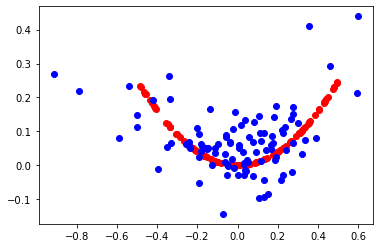

501 1.0 0.3400000035762787
502 1.0 0.36000001430511475
503 1.0 0.3799999952316284
504 1.0 0.3799999952316284
505 1.0 0.27000001072883606
506 1.0 0.28999999165534973
507 1.0 0.3199999928474426
508 1.0 0.3199999928474426
509 1.0 0.27000001072883606
510 1.0 0.3100000023841858
511 1.0 0.33000001311302185
512 1.0 0.2800000011920929
513 1.0 0.25999999046325684
514 1.0 0.30000001192092896
515 1.0 0.33000001311302185
516 1.0 0.3799999952316284
517 1.0 0.3199999928474426
518 1.0 0.3199999928474426
519 1.0 0.38999998569488525
520 1.0 0.30000001192092896
521 1.0 0.46000000834465027
522 1.0 0.3400000035762787
523 1.0 0.4099999964237213
524 1.0 0.3700000047683716
525 1.0 0.27000001072883606
526 1.0 0.25999999046325684
527 1.0 0.3700000047683716
528 1.0 0.36000001430511475
529 1.0 0.20999999344348907
530 1.0 0.33000001311302185
531 1.0 0.33000001311302185
532 1.0 0.36000001430511475
533 1.0 0.36000001430511475
534 1.0 0.3499999940395355
535 1.0 0.3199999928474426
536 1.0 0.36000001430511475
537 1.0 

746 0.8700000047683716 0.3199999928474426
747 0.8100000023841858 0.3400000035762787
748 0.8600000143051147 0.3499999940395355
749 0.8999999761581421 0.3400000035762787
750 0.8600000143051147 0.3799999952316284
751 0.8199999928474426 0.33000001311302185
752 0.8999999761581421 0.38999998569488525
753 0.8399999737739563 0.36000001430511475
754 0.800000011920929 0.3799999952316284
755 0.7900000214576721 0.3799999952316284
756 0.8199999928474426 0.36000001430511475
757 0.8600000143051147 0.38999998569488525
758 0.8299999833106995 0.3799999952316284
759 0.8700000047683716 0.3799999952316284
760 0.8500000238418579 0.30000001192092896
761 0.8600000143051147 0.4300000071525574
762 0.8399999737739563 0.3499999940395355
763 0.8899999856948853 0.3499999940395355
764 0.8500000238418579 0.36000001430511475
765 0.8700000047683716 0.2800000011920929
766 0.8700000047683716 0.4399999976158142
767 0.8999999761581421 0.28999999165534973
768 0.8999999761581421 0.36000001430511475
769 0.8899999856948853 0.4

948 0.6700000166893005 0.49000000953674316
949 0.6800000071525574 0.46000000834465027
950 0.6100000143051147 0.38999998569488525
951 0.800000011920929 0.4099999964237213
952 0.7400000095367432 0.4399999976158142
953 0.7599999904632568 0.5099999904632568
954 0.7300000190734863 0.44999998807907104
955 0.7400000095367432 0.44999998807907104
956 0.800000011920929 0.46000000834465027
957 0.8100000023841858 0.46000000834465027
958 0.7799999713897705 0.4699999988079071
959 0.8700000047683716 0.5
960 0.800000011920929 0.5199999809265137
961 0.8100000023841858 0.6000000238418579
962 0.8199999928474426 0.5400000214576721
963 0.8500000238418579 0.6000000238418579
964 0.8299999833106995 0.6800000071525574
965 0.7699999809265137 0.6899999976158142
966 0.8100000023841858 0.7200000286102295
967 0.6600000262260437 0.7300000190734863
968 0.6700000166893005 0.8100000023841858
969 0.6499999761581421 0.7900000214576721
970 0.550000011920929 0.7599999904632568
971 0.550000011920929 0.8100000023841858
972 0

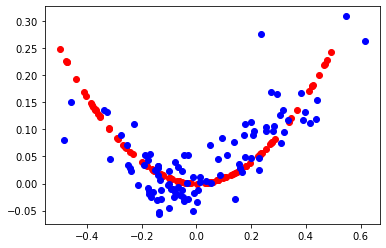

1001 0.3700000047683716 0.7400000095367432
1002 0.3700000047683716 0.6600000262260437
1003 0.3799999952316284 0.6499999761581421
1004 0.4099999964237213 0.6000000238418579
1005 0.3799999952316284 0.6800000071525574
1006 0.4699999988079071 0.6399999856948853
1007 0.2800000011920929 0.6399999856948853
1008 0.4099999964237213 0.6299999952316284
1009 0.4300000071525574 0.6600000262260437
1010 0.3100000023841858 0.6499999761581421
1011 0.3199999928474426 0.6499999761581421
1012 0.41999998688697815 0.6299999952316284
1013 0.36000001430511475 0.5699999928474426
1014 0.4399999976158142 0.5600000023841858
1015 0.47999998927116394 0.6399999856948853
1016 0.44999998807907104 0.5600000023841858
1017 0.4300000071525574 0.5600000023841858
1018 0.550000011920929 0.49000000953674316
1019 0.5099999904632568 0.4300000071525574
1020 0.699999988079071 0.5299999713897705
1021 0.6700000166893005 0.41999998688697815
1022 0.5899999737739563 0.4699999988079071
1023 0.6299999952316284 0.46000000834465027
1024 0

1201 0.7900000214576721 0.3799999952316284
1202 0.7900000214576721 0.30000001192092896
1203 0.800000011920929 0.4399999976158142
1204 0.8199999928474426 0.41999998688697815
1205 0.7699999809265137 0.3700000047683716
1206 0.7599999904632568 0.4300000071525574
1207 0.7799999713897705 0.4099999964237213
1208 0.7900000214576721 0.38999998569488525
1209 0.7699999809265137 0.36000001430511475
1210 0.75 0.4300000071525574
1211 0.8299999833106995 0.44999998807907104
1212 0.6899999976158142 0.4699999988079071
1213 0.7300000190734863 0.38999998569488525
1214 0.6800000071525574 0.5199999809265137
1215 0.6399999856948853 0.5199999809265137
1216 0.5600000023841858 0.5400000214576721
1217 0.6800000071525574 0.49000000953674316
1218 0.5899999737739563 0.6399999856948853
1219 0.6200000047683716 0.7200000286102295
1220 0.47999998927116394 0.8500000238418579
1221 0.550000011920929 0.9300000071525574
1222 0.38999998569488525 0.9300000071525574
1223 0.3799999952316284 0.9200000166893005
1224 0.41999998688

1401 0.41999998688697815 0.8999999761581421
1402 0.44999998807907104 0.9200000166893005
1403 0.5699999928474426 0.949999988079071
1404 0.49000000953674316 0.8799999952316284
1405 0.47999998927116394 0.9300000071525574
1406 0.4399999976158142 0.9200000166893005
1407 0.4699999988079071 0.8600000143051147
1408 0.3799999952316284 0.9399999976158142
1409 0.46000000834465027 0.9100000262260437
1410 0.46000000834465027 0.9100000262260437
1411 0.5600000023841858 0.8700000047683716
1412 0.41999998688697815 0.9100000262260437
1413 0.46000000834465027 0.8799999952316284
1414 0.5699999928474426 0.8999999761581421
1415 0.47999998927116394 0.8299999833106995
1416 0.550000011920929 0.8399999737739563
1417 0.4699999988079071 0.8600000143051147
1418 0.5699999928474426 0.8199999928474426
1419 0.4699999988079071 0.9100000262260437
1420 0.5199999809265137 0.800000011920929
1421 0.4699999988079071 0.8399999737739563
1422 0.5199999809265137 0.8299999833106995
1423 0.44999998807907104 0.8500000238418579
1424

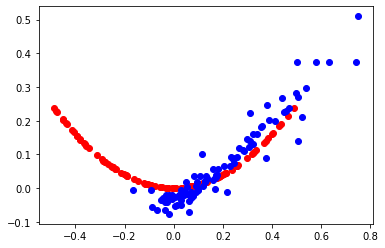

1501 0.27000001072883606 1.0
1502 0.33000001311302185 1.0
1503 0.3400000035762787 1.0
1504 0.4000000059604645 1.0
1505 0.27000001072883606 1.0
1506 0.25999999046325684 1.0
1507 0.27000001072883606 1.0
1508 0.28999999165534973 1.0
1509 0.4099999964237213 0.9900000095367432
1510 0.3400000035762787 1.0
1511 0.28999999165534973 0.9900000095367432
1512 0.25999999046325684 0.9700000286102295
1513 0.33000001311302185 0.9599999785423279
1514 0.4399999976158142 0.9700000286102295
1515 0.3799999952316284 0.9900000095367432
1516 0.3199999928474426 0.9599999785423279
1517 0.25999999046325684 0.9200000166893005
1518 0.3199999928474426 0.9300000071525574
1519 0.23999999463558197 0.9399999976158142
1520 0.3799999952316284 0.9100000262260437
1521 0.3100000023841858 0.949999988079071
1522 0.3100000023841858 0.7799999713897705
1523 0.3799999952316284 0.7799999713897705
1524 0.27000001072883606 0.75
1525 0.30000001192092896 0.7400000095367432
1526 0.36000001430511475 0.7400000095367432
1527 0.41999998688

1729 0.33000001311302185 1.0
1730 0.36000001430511475 1.0
1731 0.3499999940395355 1.0
1732 0.4399999976158142 1.0
1733 0.4099999964237213 1.0
1734 0.4399999976158142 1.0
1735 0.33000001311302185 1.0
1736 0.41999998688697815 1.0
1737 0.4099999964237213 1.0
1738 0.4699999988079071 1.0
1739 0.33000001311302185 1.0
1740 0.41999998688697815 1.0
1741 0.4300000071525574 1.0
1742 0.3700000047683716 0.9900000095367432
1743 0.4000000059604645 0.9800000190734863
1744 0.4099999964237213 0.9599999785423279
1745 0.44999998807907104 0.949999988079071
1746 0.3700000047683716 0.9100000262260437
1747 0.36000001430511475 0.8399999737739563
1748 0.30000001192092896 0.7799999713897705
1749 0.3799999952316284 0.7799999713897705
1750 0.3100000023841858 0.6899999976158142
1751 0.5799999833106995 0.6299999952316284
1752 0.46000000834465027 0.5
1753 0.41999998688697815 0.6000000238418579
1754 0.3700000047683716 0.5099999904632568
1755 0.33000001311302185 0.4000000059604645
1756 0.3400000035762787 0.259999990463

1954 0.6800000071525574 0.28999999165534973
1955 0.6399999856948853 0.4000000059604645
1956 0.6200000047683716 0.4099999964237213
1957 0.6000000238418579 0.44999998807907104
1958 0.6600000262260437 0.41999998688697815
1959 0.5400000214576721 0.4099999964237213
1960 0.5799999833106995 0.44999998807907104
1961 0.6899999976158142 0.4399999976158142
1962 0.6299999952316284 0.5699999928474426
1963 0.6299999952316284 0.46000000834465027
1964 0.5699999928474426 0.5299999713897705
1965 0.5299999713897705 0.5099999904632568
1966 0.5699999928474426 0.6800000071525574
1967 0.6200000047683716 0.6700000166893005
1968 0.5400000214576721 0.7200000286102295
1969 0.44999998807907104 0.7300000190734863
1970 0.44999998807907104 0.7400000095367432
1971 0.5299999713897705 0.8399999737739563
1972 0.46000000834465027 0.8799999952316284
1973 0.5299999713897705 0.9200000166893005
1974 0.46000000834465027 1.0
1975 0.4699999988079071 1.0
1976 0.41999998688697815 1.0
1977 0.5799999833106995 1.0
1978 0.49000000953

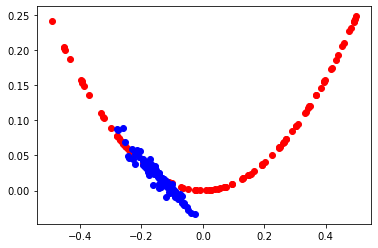

2001 0.44999998807907104 1.0
2002 0.5099999904632568 1.0
2003 0.49000000953674316 1.0
2004 0.5099999904632568 1.0
2005 0.6200000047683716 1.0
2006 0.46000000834465027 1.0
2007 0.5 1.0
2008 0.4699999988079071 1.0
2009 0.49000000953674316 1.0
2010 0.46000000834465027 1.0
2011 0.5299999713897705 1.0
2012 0.550000011920929 1.0
2013 0.38999998569488525 1.0
2014 0.47999998927116394 1.0
2015 0.5299999713897705 1.0
2016 0.5899999737739563 1.0
2017 0.47999998927116394 1.0
2018 0.49000000953674316 1.0
2019 0.49000000953674316 1.0
2020 0.5 1.0
2021 0.5899999737739563 1.0
2022 0.49000000953674316 1.0
2023 0.49000000953674316 1.0
2024 0.47999998927116394 1.0
2025 0.5899999737739563 1.0
2026 0.47999998927116394 1.0
2027 0.49000000953674316 1.0
2028 0.5 1.0
2029 0.5 1.0
2030 0.5899999737739563 1.0
2031 0.550000011920929 1.0
2032 0.4300000071525574 1.0
2033 0.5 1.0
2034 0.5299999713897705 1.0
2035 0.5299999713897705 1.0
2036 0.550000011920929 1.0
2037 0.49000000953674316 1.0
2038 0.5299999713897705 1.

2249 0.3499999940395355 0.7099999785423279
2250 0.38999998569488525 0.75
2251 0.3400000035762787 0.7200000286102295
2252 0.4099999964237213 0.6600000262260437
2253 0.4300000071525574 0.699999988079071
2254 0.4399999976158142 0.6700000166893005
2255 0.41999998688697815 0.6700000166893005
2256 0.4300000071525574 0.699999988079071
2257 0.4399999976158142 0.6200000047683716
2258 0.3700000047683716 0.550000011920929
2259 0.4000000059604645 0.5699999928474426
2260 0.3700000047683716 0.550000011920929
2261 0.49000000953674316 0.6100000143051147
2262 0.5299999713897705 0.5299999713897705
2263 0.46000000834465027 0.6499999761581421
2264 0.4000000059604645 0.5400000214576721
2265 0.5099999904632568 0.6299999952316284
2266 0.46000000834465027 0.5
2267 0.4399999976158142 0.5
2268 0.4699999988079071 0.5899999737739563
2269 0.49000000953674316 0.5799999833106995
2270 0.47999998927116394 0.5199999809265137
2271 0.38999998569488525 0.6399999856948853
2272 0.4699999988079071 0.6600000262260437
2273 0.4

2443 0.3799999952316284 0.6899999976158142
2444 0.44999998807907104 0.7900000214576721
2445 0.38999998569488525 0.7599999904632568
2446 0.3799999952316284 0.8100000023841858
2447 0.38999998569488525 0.7400000095367432
2448 0.4000000059604645 0.800000011920929
2449 0.4300000071525574 0.7699999809265137
2450 0.3799999952316284 0.8399999737739563
2451 0.33000001311302185 0.7699999809265137
2452 0.4000000059604645 0.8199999928474426
2453 0.3400000035762787 0.8399999737739563
2454 0.41999998688697815 0.7300000190734863
2455 0.4000000059604645 0.7599999904632568
2456 0.38999998569488525 0.8799999952316284
2457 0.3400000035762787 0.7400000095367432
2458 0.4099999964237213 0.7400000095367432
2459 0.3799999952316284 0.75
2460 0.38999998569488525 0.7599999904632568
2461 0.3700000047683716 0.7400000095367432
2462 0.33000001311302185 0.7599999904632568
2463 0.4099999964237213 0.7699999809265137
2464 0.3799999952316284 0.7400000095367432
2465 0.4300000071525574 0.7900000214576721
2466 0.34999999403

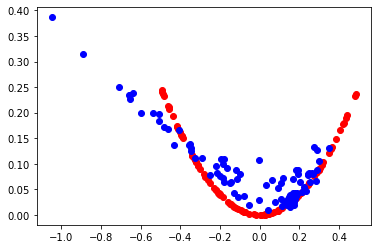

2501 0.5199999809265137 0.7599999904632568
2502 0.49000000953674316 0.7300000190734863
2503 0.47999998927116394 0.75
2504 0.550000011920929 0.7699999809265137
2505 0.4000000059604645 0.7400000095367432
2506 0.5299999713897705 0.7300000190734863
2507 0.5099999904632568 0.75
2508 0.47999998927116394 0.7900000214576721
2509 0.5799999833106995 0.75
2510 0.5299999713897705 0.7599999904632568
2511 0.47999998927116394 0.7400000095367432
2512 0.5 0.7400000095367432
2513 0.5899999737739563 0.7699999809265137
2514 0.6000000238418579 0.7400000095367432
2515 0.5199999809265137 0.7400000095367432
2516 0.5299999713897705 0.7300000190734863
2517 0.5699999928474426 0.7599999904632568
2518 0.47999998927116394 0.7300000190734863
2519 0.5299999713897705 0.7200000286102295
2520 0.4699999988079071 0.7599999904632568
2521 0.5600000023841858 0.699999988079071
2522 0.5899999737739563 0.8399999737739563
2523 0.6000000238418579 0.7799999713897705
2524 0.6000000238418579 0.7300000190734863
2525 0.5 0.82999998331

2699 0.5899999737739563 0.5099999904632568
2700 0.5699999928474426 0.5899999737739563
2701 0.5600000023841858 0.5699999928474426
2702 0.5099999904632568 0.5899999737739563
2703 0.6499999761581421 0.5400000214576721
2704 0.5799999833106995 0.5899999737739563
2705 0.5099999904632568 0.4699999988079071
2706 0.5 0.550000011920929
2707 0.6299999952316284 0.550000011920929
2708 0.5799999833106995 0.5699999928474426
2709 0.5199999809265137 0.5400000214576721
2710 0.6800000071525574 0.5600000023841858
2711 0.6200000047683716 0.49000000953674316
2712 0.6000000238418579 0.41999998688697815
2713 0.6000000238418579 0.550000011920929
2714 0.5699999928474426 0.5600000023841858
2715 0.6200000047683716 0.5799999833106995
2716 0.5799999833106995 0.5299999713897705
2717 0.6299999952316284 0.5
2718 0.6700000166893005 0.5299999713897705
2719 0.5899999737739563 0.46000000834465027
2720 0.6499999761581421 0.49000000953674316
2721 0.5899999737739563 0.47999998927116394
2722 0.6200000047683716 0.5400000214576

2894 0.49000000953674316 0.550000011920929
2895 0.550000011920929 0.5299999713897705
2896 0.5899999737739563 0.5199999809265137
2897 0.5899999737739563 0.6299999952316284
2898 0.5 0.5299999713897705
2899 0.5799999833106995 0.5799999833106995
2900 0.5799999833106995 0.5799999833106995
2901 0.5699999928474426 0.5199999809265137
2902 0.5799999833106995 0.49000000953674316
2903 0.5699999928474426 0.5199999809265137
2904 0.550000011920929 0.47999998927116394
2905 0.5899999737739563 0.5299999713897705
2906 0.5699999928474426 0.5299999713897705
2907 0.550000011920929 0.5199999809265137
2908 0.5699999928474426 0.4699999988079071
2909 0.5299999713897705 0.49000000953674316
2910 0.5 0.5
2911 0.5099999904632568 0.6299999952316284
2912 0.5099999904632568 0.6000000238418579
2913 0.5400000214576721 0.4699999988079071
2914 0.5099999904632568 0.5299999713897705
2915 0.5099999904632568 0.5600000023841858
2916 0.5099999904632568 0.5400000214576721
2917 0.550000011920929 0.550000011920929
2918 0.5 0.5199

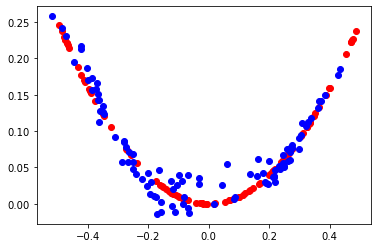

3001 0.5199999809265137 0.5600000023841858
3002 0.5299999713897705 0.49000000953674316
3003 0.5600000023841858 0.5099999904632568
3004 0.4699999988079071 0.6100000143051147
3005 0.5600000023841858 0.5600000023841858
3006 0.5799999833106995 0.5699999928474426
3007 0.6100000143051147 0.5099999904632568
3008 0.5400000214576721 0.5
3009 0.550000011920929 0.47999998927116394
3010 0.5400000214576721 0.5299999713897705
3011 0.5199999809265137 0.49000000953674316
3012 0.6100000143051147 0.47999998927116394
3013 0.5699999928474426 0.5199999809265137
3014 0.6000000238418579 0.5
3015 0.5699999928474426 0.4699999988079071
3016 0.550000011920929 0.5199999809265137
3017 0.5699999928474426 0.4399999976158142
3018 0.5099999904632568 0.5799999833106995
3019 0.5799999833106995 0.47999998927116394
3020 0.5 0.49000000953674316
3021 0.49000000953674316 0.5099999904632568
3022 0.5600000023841858 0.47999998927116394
3023 0.5699999928474426 0.5299999713897705
3024 0.5299999713897705 0.46000000834465027
3025 0

3200 0.5299999713897705 0.550000011920929
3201 0.5099999904632568 0.46000000834465027
3202 0.5299999713897705 0.5699999928474426
3203 0.5699999928474426 0.5
3204 0.5699999928474426 0.4699999988079071
3205 0.5699999928474426 0.5400000214576721
3206 0.5400000214576721 0.4399999976158142
3207 0.41999998688697815 0.5799999833106995
3208 0.46000000834465027 0.5199999809265137
3209 0.5099999904632568 0.5799999833106995
3210 0.4300000071525574 0.6000000238418579
3211 0.4099999964237213 0.41999998688697815
3212 0.4300000071525574 0.5
3213 0.4300000071525574 0.47999998927116394
3214 0.4000000059604645 0.550000011920929
3215 0.49000000953674316 0.5199999809265137
3216 0.4300000071525574 0.4699999988079071
3217 0.4300000071525574 0.5899999737739563
3218 0.4699999988079071 0.5299999713897705
3219 0.41999998688697815 0.4699999988079071
3220 0.49000000953674316 0.5400000214576721
3221 0.5400000214576721 0.5600000023841858
3222 0.5400000214576721 0.5099999904632568
3223 0.5799999833106995 0.490000009

3394 0.5299999713897705 0.3499999940395355
3395 0.7099999785423279 0.27000001072883606
3396 0.6499999761581421 0.3199999928474426
3397 0.6100000143051147 0.4399999976158142
3398 0.6000000238418579 0.4399999976158142
3399 0.6700000166893005 0.3400000035762787
3400 0.6399999856948853 0.30000001192092896
3401 0.6200000047683716 0.30000001192092896
3402 0.6399999856948853 0.5
3403 0.5199999809265137 0.44999998807907104
3404 0.5099999904632568 0.5
3405 0.5600000023841858 0.4699999988079071
3406 0.6000000238418579 0.30000001192092896
3407 0.6100000143051147 0.4300000071525574
3408 0.6299999952316284 0.38999998569488525
3409 0.47999998927116394 0.4099999964237213
3410 0.5699999928474426 0.41999998688697815
3411 0.550000011920929 0.5
3412 0.5899999737739563 0.41999998688697815
3413 0.46000000834465027 0.4399999976158142
3414 0.6000000238418579 0.38999998569488525
3415 0.6000000238418579 0.3799999952316284
3416 0.5899999737739563 0.4300000071525574
3417 0.6000000238418579 0.3799999952316284
341

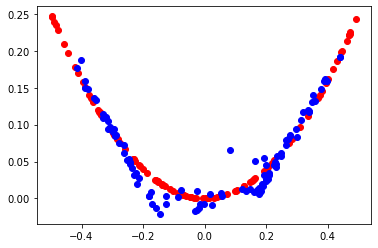

3501 0.6800000071525574 0.47999998927116394
3502 0.7300000190734863 0.5199999809265137
3503 0.6000000238418579 0.5
3504 0.6499999761581421 0.5099999904632568
3505 0.6800000071525574 0.36000001430511475
3506 0.75 0.46000000834465027
3507 0.7300000190734863 0.3700000047683716
3508 0.7599999904632568 0.4399999976158142
3509 0.7400000095367432 0.36000001430511475
3510 0.699999988079071 0.36000001430511475
3511 0.7799999713897705 0.41999998688697815
3512 0.6700000166893005 0.3400000035762787
3513 0.7400000095367432 0.3700000047683716
3514 0.7200000286102295 0.3199999928474426
3515 0.7699999809265137 0.4000000059604645
3516 0.7699999809265137 0.3199999928474426
3517 0.7400000095367432 0.3400000035762787
3518 0.7599999904632568 0.25
3519 0.7799999713897705 0.3100000023841858
3520 0.8100000023841858 0.3499999940395355
3521 0.7699999809265137 0.3100000023841858
3522 0.699999988079071 0.33000001311302185
3523 0.8100000023841858 0.38999998569488525
3524 0.6700000166893005 0.3499999940395355
3525 

3701 0.4699999988079071 0.5799999833106995
3702 0.5600000023841858 0.6299999952316284
3703 0.6299999952316284 0.49000000953674316
3704 0.5600000023841858 0.5099999904632568
3705 0.5899999737739563 0.49000000953674316
3706 0.699999988079071 0.4099999964237213
3707 0.6800000071525574 0.4000000059604645
3708 0.6499999761581421 0.47999998927116394
3709 0.6399999856948853 0.4699999988079071
3710 0.7300000190734863 0.4399999976158142
3711 0.6800000071525574 0.5299999713897705
3712 0.5400000214576721 0.4300000071525574
3713 0.6000000238418579 0.5600000023841858
3714 0.6200000047683716 0.4699999988079071
3715 0.6399999856948853 0.44999998807907104
3716 0.699999988079071 0.4000000059604645
3717 0.6100000143051147 0.47999998927116394
3718 0.6600000262260437 0.44999998807907104
3719 0.7400000095367432 0.41999998688697815
3720 0.6100000143051147 0.4399999976158142
3721 0.7099999785423279 0.5
3722 0.75 0.5
3723 0.6200000047683716 0.5099999904632568
3724 0.6499999761581421 0.41999998688697815
3725 0

3901 0.8199999928474426 0.25999999046325684
3902 0.8100000023841858 0.27000001072883606
3903 0.7599999904632568 0.2199999988079071
3904 0.8299999833106995 0.25
3905 0.8100000023841858 0.27000001072883606
3906 0.8299999833106995 0.23999999463558197
3907 0.8700000047683716 0.27000001072883606
3908 0.8100000023841858 0.23000000417232513
3909 0.8500000238418579 0.18000000715255737
3910 0.8600000143051147 0.18000000715255737
3911 0.8399999737739563 0.18000000715255737
3912 0.7599999904632568 0.15000000596046448
3913 0.8600000143051147 0.1599999964237213
3914 0.8199999928474426 0.20999999344348907
3915 0.8600000143051147 0.10999999940395355
3916 0.8399999737739563 0.17000000178813934
3917 0.8700000047683716 0.1899999976158142
3918 0.8500000238418579 0.25999999046325684
3919 0.8899999856948853 0.1599999964237213
3920 0.8700000047683716 0.15000000596046448
3921 0.9200000166893005 0.20000000298023224
3922 0.8899999856948853 0.20000000298023224
3923 0.8199999928474426 0.18000000715255737
3924 0.

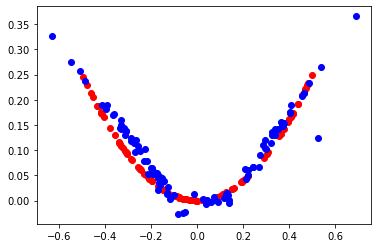

4001 0.8600000143051147 0.25999999046325684
4002 0.8299999833106995 0.25999999046325684
4003 0.7400000095367432 0.20000000298023224
4004 0.7900000214576721 0.23000000417232513
4005 0.8199999928474426 0.1599999964237213
4006 0.7799999713897705 0.23000000417232513
4007 0.7599999904632568 0.20000000298023224
4008 0.8600000143051147 0.25
4009 0.8399999737739563 0.23000000417232513
4010 0.800000011920929 0.17000000178813934
4011 0.800000011920929 0.23000000417232513
4012 0.8500000238418579 0.18000000715255737
4013 0.8100000023841858 0.15000000596046448
4014 0.8799999952316284 0.23000000417232513
4015 0.9100000262260437 0.15000000596046448
4016 0.8100000023841858 0.23999999463558197
4017 0.8299999833106995 0.2800000011920929
4018 0.7900000214576721 0.23000000417232513
4019 0.8399999737739563 0.25
4020 0.7699999809265137 0.23999999463558197
4021 0.7799999713897705 0.2800000011920929
4022 0.7200000286102295 0.23000000417232513
4023 0.6800000071525574 0.3400000035762787
4024 0.699999988079071 0

4196 0.6000000238418579 0.4300000071525574
4197 0.6399999856948853 0.5099999904632568
4198 0.5899999737739563 0.5199999809265137
4199 0.5400000214576721 0.5
4200 0.5799999833106995 0.5199999809265137
4201 0.44999998807907104 0.5099999904632568
4202 0.5400000214576721 0.44999998807907104
4203 0.6299999952316284 0.46000000834465027
4204 0.49000000953674316 0.49000000953674316
4205 0.5099999904632568 0.5099999904632568
4206 0.550000011920929 0.47999998927116394
4207 0.5899999737739563 0.5299999713897705
4208 0.6299999952316284 0.47999998927116394
4209 0.5799999833106995 0.4699999988079071
4210 0.6299999952316284 0.5099999904632568
4211 0.6299999952316284 0.5199999809265137
4212 0.550000011920929 0.5
4213 0.5199999809265137 0.3799999952316284
4214 0.6000000238418579 0.5199999809265137
4215 0.46000000834465027 0.5099999904632568
4216 0.5799999833106995 0.5199999809265137
4217 0.5400000214576721 0.49000000953674316
4218 0.5 0.41999998688697815
4219 0.5199999809265137 0.25999999046325684
4220

4398 0.75 0.20999999344348907
4399 0.8199999928474426 0.28999999165534973
4400 0.8100000023841858 0.20999999344348907
4401 0.8899999856948853 0.25
4402 0.8600000143051147 0.30000001192092896
4403 0.8100000023841858 0.1899999976158142
4404 0.8899999856948853 0.18000000715255737
4405 0.8100000023841858 0.1599999964237213
4406 0.8399999737739563 0.25
4407 0.8299999833106995 0.25
4408 0.8199999928474426 0.25999999046325684
4409 0.8899999856948853 0.18000000715255737
4410 0.8799999952316284 0.28999999165534973
4411 0.75 0.27000001072883606
4412 0.7799999713897705 0.3400000035762787
4413 0.7900000214576721 0.2800000011920929
4414 0.8700000047683716 0.3499999940395355
4415 0.800000011920929 0.2800000011920929
4416 0.75 0.20000000298023224
4417 0.800000011920929 0.23000000417232513
4418 0.7699999809265137 0.33000001311302185
4419 0.8299999833106995 0.27000001072883606
4420 0.800000011920929 0.30000001192092896
4421 0.8199999928474426 0.15000000596046448
4422 0.8100000023841858 0.28000000119209

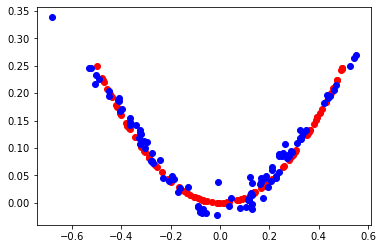

4501 0.8700000047683716 0.17000000178813934
4502 0.8100000023841858 0.1599999964237213
4503 0.8199999928474426 0.2199999988079071
4504 0.8199999928474426 0.20000000298023224
4505 0.7699999809265137 0.30000001192092896
4506 0.7900000214576721 0.15000000596046448
4507 0.8199999928474426 0.2800000011920929
4508 0.7799999713897705 0.18000000715255737
4509 0.7799999713897705 0.2800000011920929
4510 0.7900000214576721 0.23999999463558197
4511 0.7699999809265137 0.3499999940395355
4512 0.8299999833106995 0.3100000023841858
4513 0.8199999928474426 0.3400000035762787
4514 0.75 0.25
4515 0.7599999904632568 0.3100000023841858
4516 0.7699999809265137 0.23999999463558197
4517 0.7900000214576721 0.3199999928474426
4518 0.7400000095367432 0.2199999988079071
4519 0.7799999713897705 0.1899999976158142
4520 0.800000011920929 0.28999999165534973
4521 0.75 0.28999999165534973
4522 0.8199999928474426 0.2800000011920929
4523 0.8399999737739563 0.23000000417232513
4524 0.7900000214576721 0.27000001072883606


4700 0.6499999761581421 0.33000001311302185
4701 0.699999988079071 0.4300000071525574
4702 0.75 0.38999998569488525
4703 0.6499999761581421 0.38999998569488525
4704 0.7300000190734863 0.49000000953674316
4705 0.7099999785423279 0.4399999976158142
4706 0.6499999761581421 0.3700000047683716
4707 0.7099999785423279 0.4099999964237213
4708 0.6499999761581421 0.49000000953674316
4709 0.7099999785423279 0.4399999976158142
4710 0.699999988079071 0.44999998807907104
4711 0.699999988079071 0.44999998807907104
4712 0.6800000071525574 0.49000000953674316
4713 0.7699999809265137 0.41999998688697815
4714 0.6700000166893005 0.41999998688697815
4715 0.7099999785423279 0.46000000834465027
4716 0.6700000166893005 0.5
4717 0.6600000262260437 0.3499999940395355
4718 0.6299999952316284 0.36000001430511475
4719 0.6899999976158142 0.46000000834465027
4720 0.5899999737739563 0.41999998688697815
4721 0.6299999952316284 0.44999998807907104
4722 0.6299999952316284 0.41999998688697815
4723 0.7599999904632568 0.4

4896 0.5899999737739563 0.4099999964237213
4897 0.6100000143051147 0.4300000071525574
4898 0.6299999952316284 0.46000000834465027
4899 0.5400000214576721 0.36000001430511475
4900 0.5899999737739563 0.4399999976158142
4901 0.5 0.5099999904632568
4902 0.6000000238418579 0.3199999928474426
4903 0.6499999761581421 0.44999998807907104
4904 0.6700000166893005 0.36000001430511475
4905 0.5699999928474426 0.33000001311302185
4906 0.5899999737739563 0.38999998569488525
4907 0.6499999761581421 0.4300000071525574
4908 0.6200000047683716 0.5600000023841858
4909 0.6100000143051147 0.44999998807907104
4910 0.6100000143051147 0.3700000047683716
4911 0.5299999713897705 0.4699999988079071
4912 0.5 0.36000001430511475
4913 0.6200000047683716 0.46000000834465027
4914 0.6100000143051147 0.41999998688697815
4915 0.5699999928474426 0.4300000071525574
4916 0.5899999737739563 0.4300000071525574
4917 0.5099999904632568 0.44999998807907104
4918 0.5299999713897705 0.5600000023841858
4919 0.5699999928474426 0.5299

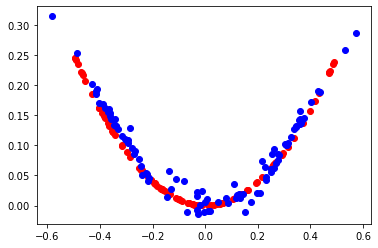

5001 0.5400000214576721 0.5099999904632568
5002 0.5 0.5
5003 0.4399999976158142 0.4300000071525574
5004 0.5799999833106995 0.49000000953674316
5005 0.5099999904632568 0.4399999976158142
5006 0.5600000023841858 0.5299999713897705
5007 0.4699999988079071 0.6000000238418579
5008 0.5199999809265137 0.5199999809265137
5009 0.44999998807907104 0.5400000214576721
5010 0.6399999856948853 0.5799999833106995
5011 0.49000000953674316 0.5600000023841858
5012 0.5400000214576721 0.5699999928474426
5013 0.46000000834465027 0.49000000953674316
5014 0.5199999809265137 0.5099999904632568
5015 0.4699999988079071 0.5699999928474426
5016 0.5199999809265137 0.6299999952316284
5017 0.46000000834465027 0.6499999761581421
5018 0.47999998927116394 0.5199999809265137
5019 0.4399999976158142 0.6000000238418579
5020 0.4000000059604645 0.6000000238418579
5021 0.4699999988079071 0.6200000047683716
5022 0.5 0.550000011920929
5023 0.41999998688697815 0.6100000143051147
5024 0.41999998688697815 0.6399999856948853
5025 

5197 0.3700000047683716 0.7300000190734863
5198 0.41999998688697815 0.7099999785423279
5199 0.3199999928474426 0.6399999856948853
5200 0.4000000059604645 0.7799999713897705
5201 0.4699999988079071 0.7200000286102295
5202 0.33000001311302185 0.699999988079071
5203 0.3400000035762787 0.7099999785423279
5204 0.4099999964237213 0.6700000166893005
5205 0.33000001311302185 0.6399999856948853
5206 0.3400000035762787 0.6899999976158142
5207 0.3199999928474426 0.7200000286102295
5208 0.3700000047683716 0.6299999952316284
5209 0.4000000059604645 0.7200000286102295
5210 0.36000001430511475 0.7599999904632568
5211 0.23000000417232513 0.75
5212 0.3499999940395355 0.7400000095367432
5213 0.4300000071525574 0.7099999785423279
5214 0.47999998927116394 0.6600000262260437
5215 0.3400000035762787 0.7599999904632568
5216 0.36000001430511475 0.7300000190734863
5217 0.3100000023841858 0.7699999809265137
5218 0.38999998569488525 0.7599999904632568
5219 0.44999998807907104 0.6700000166893005
5220 0.4799999892

5396 0.5600000023841858 0.5099999904632568
5397 0.6299999952316284 0.47999998927116394
5398 0.47999998927116394 0.46000000834465027
5399 0.6399999856948853 0.5099999904632568
5400 0.6100000143051147 0.4399999976158142
5401 0.6200000047683716 0.4699999988079071
5402 0.6499999761581421 0.3499999940395355
5403 0.6899999976158142 0.4099999964237213
5404 0.7200000286102295 0.38999998569488525
5405 0.7200000286102295 0.4099999964237213
5406 0.699999988079071 0.4699999988079071
5407 0.7699999809265137 0.47999998927116394
5408 0.7099999785423279 0.4399999976158142
5409 0.6800000071525574 0.4300000071525574
5410 0.7099999785423279 0.4099999964237213
5411 0.7099999785423279 0.4399999976158142
5412 0.7300000190734863 0.4300000071525574
5413 0.6600000262260437 0.38999998569488525
5414 0.5899999737739563 0.3700000047683716
5415 0.6200000047683716 0.47999998927116394
5416 0.6800000071525574 0.3799999952316284
5417 0.699999988079071 0.4099999964237213
5418 0.7300000190734863 0.44999998807907104
5419 

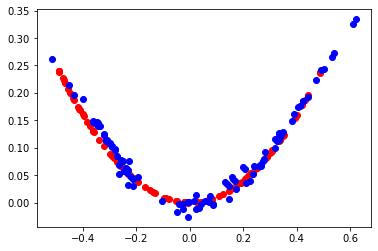

5501 0.6499999761581421 0.44999998807907104
5502 0.550000011920929 0.44999998807907104
5503 0.6100000143051147 0.3799999952316284
5504 0.5799999833106995 0.5099999904632568
5505 0.6499999761581421 0.3199999928474426
5506 0.550000011920929 0.41999998688697815
5507 0.6299999952316284 0.38999998569488525
5508 0.5799999833106995 0.38999998569488525
5509 0.6299999952316284 0.49000000953674316
5510 0.6299999952316284 0.4099999964237213
5511 0.6899999976158142 0.47999998927116394
5512 0.6600000262260437 0.44999998807907104
5513 0.6100000143051147 0.4300000071525574
5514 0.5400000214576721 0.47999998927116394
5515 0.6000000238418579 0.3799999952316284
5516 0.6399999856948853 0.33000001311302185
5517 0.6000000238418579 0.4300000071525574
5518 0.5899999737739563 0.3400000035762787
5519 0.5 0.4099999964237213
5520 0.6200000047683716 0.4399999976158142
5521 0.5199999809265137 0.47999998927116394
5522 0.550000011920929 0.47999998927116394
5523 0.6000000238418579 0.4399999976158142
5524 0.7300000190

5701 0.5699999928474426 0.6200000047683716
5702 0.46000000834465027 0.5799999833106995
5703 0.5199999809265137 0.5299999713897705
5704 0.5299999713897705 0.550000011920929
5705 0.47999998927116394 0.6100000143051147
5706 0.6299999952316284 0.4000000059604645
5707 0.41999998688697815 0.6600000262260437
5708 0.47999998927116394 0.47999998927116394
5709 0.5199999809265137 0.47999998927116394
5710 0.5099999904632568 0.5299999713897705
5711 0.49000000953674316 0.5799999833106995
5712 0.550000011920929 0.5
5713 0.5099999904632568 0.49000000953674316
5714 0.44999998807907104 0.550000011920929
5715 0.5600000023841858 0.5
5716 0.49000000953674316 0.4300000071525574
5717 0.5600000023841858 0.5199999809265137
5718 0.5899999737739563 0.4399999976158142
5719 0.5699999928474426 0.49000000953674316
5720 0.49000000953674316 0.5400000214576721
5721 0.5299999713897705 0.4399999976158142
5722 0.5199999809265137 0.5299999713897705
5723 0.5400000214576721 0.5099999904632568
5724 0.5199999809265137 0.540000

5899 0.5299999713897705 0.550000011920929
5900 0.49000000953674316 0.6299999952316284
5901 0.44999998807907104 0.5899999737739563
5902 0.49000000953674316 0.5199999809265137
5903 0.5 0.5
5904 0.5299999713897705 0.5799999833106995
5905 0.4399999976158142 0.550000011920929
5906 0.5400000214576721 0.5899999737739563
5907 0.4000000059604645 0.5699999928474426
5908 0.47999998927116394 0.5
5909 0.4699999988079071 0.5299999713897705
5910 0.5400000214576721 0.5199999809265137
5911 0.5199999809265137 0.44999998807907104
5912 0.5 0.5400000214576721
5913 0.5899999737739563 0.550000011920929
5914 0.5400000214576721 0.5699999928474426
5915 0.5299999713897705 0.6000000238418579
5916 0.5099999904632568 0.5400000214576721
5917 0.3400000035762787 0.5600000023841858
5918 0.5799999833106995 0.5699999928474426
5919 0.5099999904632568 0.5299999713897705
5920 0.6000000238418579 0.49000000953674316
5921 0.5600000023841858 0.5400000214576721
5922 0.5400000214576721 0.47999998927116394
5923 0.5099999904632568 

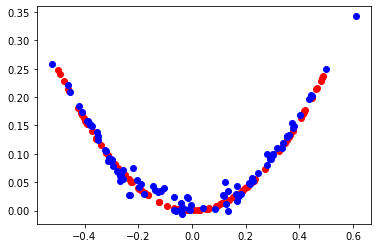

6001 0.4699999988079071 0.5
6002 0.4699999988079071 0.5699999928474426
6003 0.44999998807907104 0.5899999737739563
6004 0.46000000834465027 0.5600000023841858
6005 0.4000000059604645 0.5799999833106995
6006 0.5299999713897705 0.5899999737739563
6007 0.41999998688697815 0.550000011920929
6008 0.4000000059604645 0.699999988079071
6009 0.41999998688697815 0.5799999833106995
6010 0.41999998688697815 0.6200000047683716
6011 0.44999998807907104 0.550000011920929
6012 0.38999998569488525 0.6899999976158142
6013 0.44999998807907104 0.6499999761581421
6014 0.47999998927116394 0.6000000238418579
6015 0.4099999964237213 0.6600000262260437
6016 0.41999998688697815 0.5899999737739563
6017 0.550000011920929 0.5600000023841858
6018 0.5299999713897705 0.699999988079071
6019 0.550000011920929 0.6800000071525574
6020 0.4300000071525574 0.6000000238418579
6021 0.4300000071525574 0.6100000143051147
6022 0.5199999809265137 0.6100000143051147
6023 0.5199999809265137 0.6299999952316284
6024 0.389999985694885

6200 0.4300000071525574 0.6100000143051147
6201 0.3499999940395355 0.6499999761581421
6202 0.41999998688697815 0.6800000071525574
6203 0.49000000953674316 0.75
6204 0.47999998927116394 0.6200000047683716
6205 0.49000000953674316 0.6899999976158142
6206 0.4300000071525574 0.75
6207 0.38999998569488525 0.7099999785423279
6208 0.41999998688697815 0.7099999785423279
6209 0.3700000047683716 0.699999988079071
6210 0.3100000023841858 0.6899999976158142
6211 0.3799999952316284 0.6200000047683716
6212 0.36000001430511475 0.7200000286102295
6213 0.41999998688697815 0.7699999809265137
6214 0.3700000047683716 0.6299999952316284
6215 0.44999998807907104 0.6399999856948853
6216 0.4300000071525574 0.7200000286102295
6217 0.38999998569488525 0.6700000166893005
6218 0.46000000834465027 0.6700000166893005
6219 0.3499999940395355 0.7099999785423279
6220 0.33000001311302185 0.6100000143051147
6221 0.4099999964237213 0.7400000095367432
6222 0.33000001311302185 0.6600000262260437
6223 0.44999998807907104 0.

6392 0.3700000047683716 0.6800000071525574
6393 0.36000001430511475 0.699999988079071
6394 0.3100000023841858 0.7400000095367432
6395 0.3799999952316284 0.699999988079071
6396 0.3700000047683716 0.7099999785423279
6397 0.33000001311302185 0.699999988079071
6398 0.33000001311302185 0.6600000262260437
6399 0.23999999463558197 0.6899999976158142
6400 0.3799999952316284 0.7599999904632568
6401 0.3199999928474426 0.6899999976158142
6402 0.28999999165534973 0.7099999785423279
6403 0.27000001072883606 0.6399999856948853
6404 0.30000001192092896 0.7900000214576721
6405 0.4399999976158142 0.6800000071525574
6406 0.30000001192092896 0.6100000143051147
6407 0.3400000035762787 0.699999988079071
6408 0.36000001430511475 0.7300000190734863
6409 0.25 0.7099999785423279
6410 0.3700000047683716 0.75
6411 0.4000000059604645 0.8100000023841858
6412 0.20999999344348907 0.7900000214576721
6413 0.3799999952316284 0.7799999713897705
6414 0.3700000047683716 0.800000011920929
6415 0.3499999940395355 0.77999997

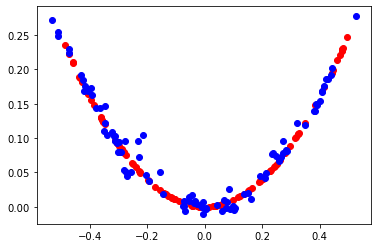

6501 0.36000001430511475 0.6100000143051147
6502 0.3199999928474426 0.5799999833106995
6503 0.3400000035762787 0.6600000262260437
6504 0.3700000047683716 0.6000000238418579
6505 0.4300000071525574 0.6200000047683716
6506 0.3799999952316284 0.6499999761581421
6507 0.3499999940395355 0.6000000238418579
6508 0.38999998569488525 0.699999988079071
6509 0.4699999988079071 0.6499999761581421
6510 0.4300000071525574 0.6600000262260437
6511 0.4000000059604645 0.5799999833106995
6512 0.3700000047683716 0.6800000071525574
6513 0.36000001430511475 0.7300000190734863
6514 0.3400000035762787 0.75
6515 0.4000000059604645 0.6200000047683716
6516 0.3799999952316284 0.5899999737739563
6517 0.3400000035762787 0.5299999713897705
6518 0.30000001192092896 0.7400000095367432
6519 0.3499999940395355 0.6700000166893005
6520 0.4300000071525574 0.699999988079071
6521 0.36000001430511475 0.5899999737739563
6522 0.3100000023841858 0.5799999833106995
6523 0.3400000035762787 0.6800000071525574
6524 0.360000014305114

6696 0.3799999952316284 0.75
6697 0.25999999046325684 0.7300000190734863
6698 0.25999999046325684 0.7300000190734863
6699 0.30000001192092896 0.75
6700 0.3199999928474426 0.800000011920929
6701 0.20999999344348907 0.7300000190734863
6702 0.3700000047683716 0.7300000190734863
6703 0.25999999046325684 0.699999988079071
6704 0.30000001192092896 0.7300000190734863
6705 0.2800000011920929 0.7400000095367432
6706 0.25 0.75
6707 0.36000001430511475 0.7699999809265137
6708 0.36000001430511475 0.7400000095367432
6709 0.33000001311302185 0.7400000095367432
6710 0.4000000059604645 0.699999988079071
6711 0.28999999165534973 0.7099999785423279
6712 0.20000000298023224 0.7099999785423279
6713 0.28999999165534973 0.699999988079071
6714 0.33000001311302185 0.699999988079071
6715 0.3199999928474426 0.800000011920929
6716 0.27000001072883606 0.7200000286102295
6717 0.27000001072883606 0.7799999713897705
6718 0.27000001072883606 0.7400000095367432
6719 0.33000001311302185 0.7799999713897705
6720 0.310000

6896 0.3799999952316284 0.8299999833106995
6897 0.28999999165534973 0.7900000214576721
6898 0.25999999046325684 0.8299999833106995
6899 0.4000000059604645 0.8700000047683716
6900 0.2800000011920929 0.8199999928474426
6901 0.3499999940395355 0.8100000023841858
6902 0.3100000023841858 0.8199999928474426
6903 0.2199999988079071 0.8500000238418579
6904 0.23000000417232513 0.800000011920929
6905 0.3100000023841858 0.8199999928474426
6906 0.2800000011920929 0.8700000047683716
6907 0.20000000298023224 0.8899999856948853
6908 0.3100000023841858 0.8700000047683716
6909 0.25999999046325684 0.8999999761581421
6910 0.25 0.8700000047683716
6911 0.2199999988079071 0.8899999856948853
6912 0.30000001192092896 0.800000011920929
6913 0.3799999952316284 0.8299999833106995
6914 0.33000001311302185 0.8299999833106995
6915 0.25999999046325684 0.800000011920929
6916 0.25 0.8199999928474426
6917 0.23999999463558197 0.8399999737739563
6918 0.28999999165534973 0.8100000023841858
6919 0.3400000035762787 0.800000

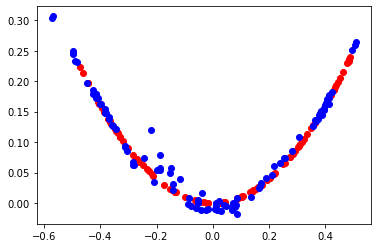

7001 0.4399999976158142 0.7599999904632568
7002 0.3499999940395355 0.7400000095367432
7003 0.4000000059604645 0.7400000095367432
7004 0.28999999165534973 0.800000011920929
7005 0.3499999940395355 0.7400000095367432
7006 0.3400000035762787 0.75
7007 0.3199999928474426 0.7699999809265137
7008 0.3799999952316284 0.7799999713897705
7009 0.36000001430511475 0.75
7010 0.3400000035762787 0.7599999904632568
7011 0.3499999940395355 0.7799999713897705
7012 0.2800000011920929 0.8299999833106995
7013 0.36000001430511475 0.8100000023841858
7014 0.3100000023841858 0.7799999713897705
7015 0.3799999952316284 0.8100000023841858
7016 0.4000000059604645 0.800000011920929
7017 0.36000001430511475 0.8299999833106995
7018 0.41999998688697815 0.8299999833106995
7019 0.3700000047683716 0.7900000214576721
7020 0.33000001311302185 0.8299999833106995
7021 0.3700000047683716 0.7099999785423279
7022 0.36000001430511475 0.7900000214576721
7023 0.28999999165534973 0.8299999833106995
7024 0.3400000035762787 0.7900000

7201 0.30000001192092896 0.800000011920929
7202 0.3400000035762787 0.800000011920929
7203 0.28999999165534973 0.8100000023841858
7204 0.23999999463558197 0.7799999713897705
7205 0.2800000011920929 0.8399999737739563
7206 0.3199999928474426 0.7799999713897705
7207 0.27000001072883606 0.7799999713897705
7208 0.25999999046325684 0.7900000214576721
7209 0.27000001072883606 0.800000011920929
7210 0.27000001072883606 0.800000011920929
7211 0.3199999928474426 0.7699999809265137
7212 0.23000000417232513 0.8100000023841858
7213 0.28999999165534973 0.800000011920929
7214 0.25999999046325684 0.800000011920929
7215 0.20000000298023224 0.8100000023841858
7216 0.33000001311302185 0.8299999833106995
7217 0.27000001072883606 0.8100000023841858
7218 0.3199999928474426 0.8100000023841858
7219 0.3199999928474426 0.8100000023841858
7220 0.33000001311302185 0.8100000023841858
7221 0.3199999928474426 0.7900000214576721
7222 0.3400000035762787 0.7799999713897705
7223 0.3700000047683716 0.699999988079071
7224

7401 0.44999998807907104 0.6100000143051147
7402 0.44999998807907104 0.6499999761581421
7403 0.38999998569488525 0.5600000023841858
7404 0.3700000047683716 0.6000000238418579
7405 0.44999998807907104 0.6000000238418579
7406 0.3700000047683716 0.6299999952316284
7407 0.4099999964237213 0.6299999952316284
7408 0.4399999976158142 0.6200000047683716
7409 0.4399999976158142 0.5600000023841858
7410 0.49000000953674316 0.6000000238418579
7411 0.38999998569488525 0.6200000047683716
7412 0.36000001430511475 0.6000000238418579
7413 0.4000000059604645 0.6600000262260437
7414 0.4099999964237213 0.5799999833106995
7415 0.4099999964237213 0.5899999737739563
7416 0.4699999988079071 0.6000000238418579
7417 0.36000001430511475 0.6499999761581421
7418 0.5600000023841858 0.49000000953674316
7419 0.5 0.6200000047683716
7420 0.3400000035762787 0.6200000047683716
7421 0.5400000214576721 0.6000000238418579
7422 0.4699999988079071 0.6899999976158142
7423 0.4300000071525574 0.5899999737739563
7424 0.3899999856

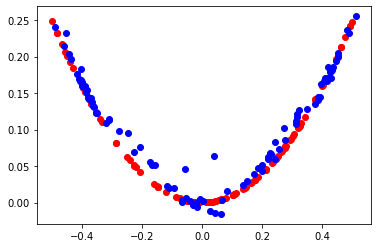

7501 0.6000000238418579 0.25
7502 0.6600000262260437 0.33000001311302185
7503 0.6100000143051147 0.3400000035762787
7504 0.5899999737739563 0.3700000047683716
7505 0.5799999833106995 0.41999998688697815
7506 0.5199999809265137 0.3799999952316284
7507 0.4699999988079071 0.4000000059604645
7508 0.5699999928474426 0.4099999964237213
7509 0.49000000953674316 0.38999998569488525
7510 0.5 0.36000001430511475
7511 0.4699999988079071 0.41999998688697815
7512 0.550000011920929 0.4099999964237213
7513 0.44999998807907104 0.5
7514 0.5199999809265137 0.4699999988079071
7515 0.5400000214576721 0.49000000953674316
7516 0.4099999964237213 0.46000000834465027
7517 0.49000000953674316 0.5099999904632568
7518 0.4099999964237213 0.5699999928474426
7519 0.38999998569488525 0.47999998927116394
7520 0.36000001430511475 0.5
7521 0.41999998688697815 0.5699999928474426
7522 0.4000000059604645 0.5799999833106995
7523 0.4099999964237213 0.5699999928474426
7524 0.41999998688697815 0.6000000238418579
7525 0.330000

7698 0.5400000214576721 0.6000000238418579
7699 0.5600000023841858 0.49000000953674316
7700 0.5199999809265137 0.5099999904632568
7701 0.5600000023841858 0.6299999952316284
7702 0.5199999809265137 0.550000011920929
7703 0.6200000047683716 0.5699999928474426
7704 0.6200000047683716 0.5099999904632568
7705 0.550000011920929 0.5699999928474426
7706 0.6700000166893005 0.44999998807907104
7707 0.6399999856948853 0.4300000071525574
7708 0.6800000071525574 0.5299999713897705
7709 0.6600000262260437 0.46000000834465027
7710 0.6000000238418579 0.47999998927116394
7711 0.6600000262260437 0.46000000834465027
7712 0.8100000023841858 0.4099999964237213
7713 0.7699999809265137 0.28999999165534973
7714 0.8399999737739563 0.30000001192092896
7715 0.8999999761581421 0.2800000011920929
7716 0.8700000047683716 0.25
7717 0.7799999713897705 0.2199999988079071
7718 0.8700000047683716 0.23999999463558197
7719 0.800000011920929 0.27000001072883606
7720 0.800000011920929 0.1899999976158142
7721 0.8299999833106

7897 0.49000000953674316 0.6000000238418579
7898 0.4699999988079071 0.6700000166893005
7899 0.4300000071525574 0.6899999976158142
7900 0.3400000035762787 0.6399999856948853
7901 0.46000000834465027 0.6399999856948853
7902 0.49000000953674316 0.6299999952316284
7903 0.44999998807907104 0.550000011920929
7904 0.47999998927116394 0.6600000262260437
7905 0.44999998807907104 0.7300000190734863
7906 0.3400000035762787 0.8199999928474426
7907 0.3199999928474426 0.6899999976158142
7908 0.3400000035762787 0.8700000047683716
7909 0.25999999046325684 0.7799999713897705
7910 0.4000000059604645 0.800000011920929
7911 0.36000001430511475 0.7599999904632568
7912 0.2199999988079071 0.7799999713897705
7913 0.3400000035762787 0.7799999713897705
7914 0.3100000023841858 0.8299999833106995
7915 0.3400000035762787 0.8199999928474426
7916 0.33000001311302185 0.800000011920929
7917 0.3499999940395355 0.800000011920929
7918 0.36000001430511475 0.8500000238418579
7919 0.28999999165534973 0.7900000214576721
7920

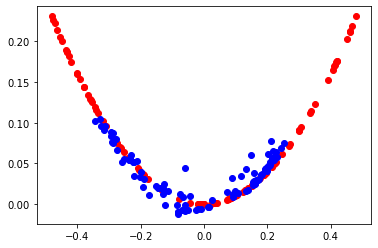

8001 0.9100000262260437 0.09000000357627869
8002 0.8899999856948853 0.10000000149011612
8003 0.9700000286102295 0.09000000357627869
8004 0.8999999761581421 0.11999999731779099
8005 0.8500000238418579 0.10000000149011612
8006 0.9300000071525574 0.10999999940395355
8007 0.9200000166893005 0.12999999523162842
8008 0.9200000166893005 0.07000000029802322
8009 0.8999999761581421 0.12999999523162842
8010 0.8999999761581421 0.15000000596046448
8011 0.8799999952316284 0.1599999964237213
8012 0.9399999976158142 0.10000000149011612
8013 0.9100000262260437 0.1599999964237213
8014 0.9300000071525574 0.15000000596046448
8015 0.8600000143051147 0.20000000298023224
8016 0.9300000071525574 0.17000000178813934
8017 0.8700000047683716 0.2199999988079071
8018 0.9300000071525574 0.25
8019 0.9300000071525574 0.15000000596046448
8020 0.8100000023841858 0.23999999463558197
8021 0.800000011920929 0.25999999046325684
8022 0.8299999833106995 0.23000000417232513
8023 0.7799999713897705 0.2199999988079071
8024 0.7

8201 0.44999998807907104 0.6899999976158142
8202 0.44999998807907104 0.7599999904632568
8203 0.3499999940395355 0.7900000214576721
8204 0.3799999952316284 0.75
8205 0.3400000035762787 0.8399999737739563
8206 0.36000001430511475 0.7300000190734863
8207 0.25999999046325684 0.7799999713897705
8208 0.3199999928474426 0.800000011920929
8209 0.36000001430511475 0.7699999809265137
8210 0.25999999046325684 0.7699999809265137
8211 0.3100000023841858 0.75
8212 0.36000001430511475 0.7699999809265137
8213 0.3400000035762787 0.8700000047683716
8214 0.2800000011920929 0.8500000238418579
8215 0.2800000011920929 0.8100000023841858
8216 0.25999999046325684 0.8100000023841858
8217 0.3499999940395355 0.7900000214576721
8218 0.3700000047683716 0.8199999928474426
8219 0.23999999463558197 0.7599999904632568
8220 0.33000001311302185 0.8399999737739563
8221 0.3199999928474426 0.8399999737739563
8222 0.3700000047683716 0.8299999833106995
8223 0.25999999046325684 0.7200000286102295
8224 0.20000000298023224 0.75

8394 0.49000000953674316 0.5600000023841858
8395 0.47999998927116394 0.5
8396 0.5 0.46000000834465027
8397 0.46000000834465027 0.46000000834465027
8398 0.4399999976158142 0.5400000214576721
8399 0.3799999952316284 0.47999998927116394
8400 0.3499999940395355 0.46000000834465027
8401 0.4000000059604645 0.5199999809265137
8402 0.4399999976158142 0.5799999833106995
8403 0.4300000071525574 0.49000000953674316
8404 0.36000001430511475 0.47999998927116394
8405 0.36000001430511475 0.5699999928474426
8406 0.3499999940395355 0.550000011920929
8407 0.27000001072883606 0.6100000143051147
8408 0.3700000047683716 0.47999998927116394
8409 0.3700000047683716 0.550000011920929
8410 0.38999998569488525 0.5600000023841858
8411 0.3100000023841858 0.5799999833106995
8412 0.25 0.5899999737739563
8413 0.25999999046325684 0.7099999785423279
8414 0.25999999046325684 0.6299999952316284
8415 0.25 0.7400000095367432
8416 0.23000000417232513 0.7200000286102295
8417 0.25 0.7200000286102295
8418 0.2800000011920929 0

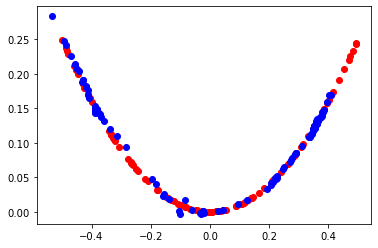

8501 0.2199999988079071 0.8999999761581421
8502 0.15000000596046448 0.9300000071525574
8503 0.20000000298023224 0.9100000262260437
8504 0.20000000298023224 0.8600000143051147
8505 0.20000000298023224 0.8600000143051147
8506 0.25 0.9300000071525574
8507 0.15000000596046448 0.8500000238418579
8508 0.25 0.8199999928474426
8509 0.23000000417232513 0.9200000166893005
8510 0.2800000011920929 0.9200000166893005
8511 0.25999999046325684 0.8299999833106995
8512 0.20999999344348907 0.8299999833106995
8513 0.27000001072883606 0.8600000143051147
8514 0.3400000035762787 0.8100000023841858
8515 0.23999999463558197 0.8399999737739563
8516 0.25 0.8500000238418579
8517 0.25 0.8299999833106995
8518 0.25999999046325684 0.9100000262260437
8519 0.3100000023841858 0.8500000238418579
8520 0.25999999046325684 0.8799999952316284
8521 0.23000000417232513 0.7599999904632568
8522 0.28999999165534973 0.8199999928474426
8523 0.3199999928474426 0.800000011920929
8524 0.3499999940395355 0.7699999809265137
8525 0.2899

8703 0.46000000834465027 0.6399999856948853
8704 0.4699999988079071 0.5400000214576721
8705 0.4099999964237213 0.5899999737739563
8706 0.3799999952316284 0.5799999833106995
8707 0.3700000047683716 0.6000000238418579
8708 0.3799999952316284 0.6600000262260437
8709 0.4000000059604645 0.5699999928474426
8710 0.3799999952316284 0.5899999737739563
8711 0.4399999976158142 0.5699999928474426
8712 0.30000001192092896 0.6100000143051147
8713 0.4000000059604645 0.5899999737739563
8714 0.30000001192092896 0.6800000071525574
8715 0.36000001430511475 0.5299999713897705
8716 0.4300000071525574 0.6499999761581421
8717 0.41999998688697815 0.699999988079071
8718 0.3700000047683716 0.5799999833106995
8719 0.4099999964237213 0.6399999856948853
8720 0.4000000059604645 0.6100000143051147
8721 0.4399999976158142 0.5600000023841858
8722 0.4699999988079071 0.5400000214576721
8723 0.28999999165534973 0.6200000047683716
8724 0.4099999964237213 0.5899999737739563
8725 0.4000000059604645 0.5899999737739563
8726 0

8900 0.3700000047683716 0.7099999785423279
8901 0.33000001311302185 0.7599999904632568
8902 0.36000001430511475 0.6899999976158142
8903 0.3799999952316284 0.7699999809265137
8904 0.3499999940395355 0.7400000095367432
8905 0.3400000035762787 0.699999988079071
8906 0.2800000011920929 0.7200000286102295
8907 0.33000001311302185 0.7300000190734863
8908 0.3100000023841858 0.7400000095367432
8909 0.4300000071525574 0.8199999928474426
8910 0.38999998569488525 0.7799999713897705
8911 0.38999998569488525 0.8199999928474426
8912 0.3700000047683716 0.699999988079071
8913 0.4300000071525574 0.7200000286102295
8914 0.38999998569488525 0.7400000095367432
8915 0.38999998569488525 0.7200000286102295
8916 0.4099999964237213 0.800000011920929
8917 0.33000001311302185 0.7599999904632568
8918 0.41999998688697815 0.7200000286102295
8919 0.3100000023841858 0.7099999785423279
8920 0.3799999952316284 0.8399999737739563
8921 0.25 0.8199999928474426
8922 0.23999999463558197 0.8100000023841858
8923 0.33000001311

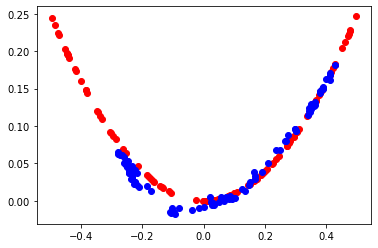

9001 0.7300000190734863 0.38999998569488525
9002 0.7900000214576721 0.28999999165534973
9003 0.7300000190734863 0.36000001430511475
9004 0.7799999713897705 0.4300000071525574
9005 0.7099999785423279 0.38999998569488525
9006 0.699999988079071 0.3199999928474426
9007 0.6499999761581421 0.46000000834465027
9008 0.7400000095367432 0.4099999964237213
9009 0.800000011920929 0.41999998688697815
9010 0.8399999737739563 0.3799999952316284
9011 0.7400000095367432 0.28999999165534973
9012 0.75 0.3499999940395355
9013 0.8600000143051147 0.3199999928474426
9014 0.7599999904632568 0.20999999344348907
9015 0.699999988079071 0.25999999046325684
9016 0.800000011920929 0.28999999165534973
9017 0.7799999713897705 0.2800000011920929
9018 0.7400000095367432 0.3400000035762787
9019 0.7400000095367432 0.27000001072883606
9020 0.7599999904632568 0.30000001192092896
9021 0.7900000214576721 0.3400000035762787
9022 0.800000011920929 0.3100000023841858
9023 0.7799999713897705 0.27000001072883606
9024 0.8399999737

9195 0.27000001072883606 0.7799999713897705
9196 0.20000000298023224 0.800000011920929
9197 0.23999999463558197 0.7799999713897705
9198 0.17000000178813934 0.7699999809265137
9199 0.25999999046325684 0.7699999809265137
9200 0.23000000417232513 0.800000011920929
9201 0.20000000298023224 0.8399999737739563
9202 0.25 0.8500000238418579
9203 0.2199999988079071 0.8600000143051147
9204 0.09000000357627869 0.7799999713897705
9205 0.23000000417232513 0.75
9206 0.14000000059604645 0.7099999785423279
9207 0.17000000178813934 0.8600000143051147
9208 0.1599999964237213 0.8299999833106995
9209 0.1599999964237213 0.699999988079071
9210 0.23999999463558197 0.699999988079071
9211 0.28999999165534973 0.699999988079071
9212 0.30000001192092896 0.7099999785423279
9213 0.27000001072883606 0.7099999785423279
9214 0.25999999046325684 0.7200000286102295
9215 0.23999999463558197 0.6899999976158142
9216 0.25999999046325684 0.6499999761581421
9217 0.1899999976158142 0.7200000286102295
9218 0.20999999344348907 0

9388 0.6899999976158142 0.4399999976158142
9389 0.5799999833106995 0.4000000059604645
9390 0.6499999761581421 0.38999998569488525
9391 0.5600000023841858 0.4399999976158142
9392 0.6499999761581421 0.4699999988079071
9393 0.6399999856948853 0.3799999952316284
9394 0.6399999856948853 0.4000000059604645
9395 0.5099999904632568 0.4300000071525574
9396 0.550000011920929 0.3400000035762787
9397 0.6000000238418579 0.4300000071525574
9398 0.550000011920929 0.4399999976158142
9399 0.5400000214576721 0.30000001192092896
9400 0.6100000143051147 0.41999998688697815
9401 0.6800000071525574 0.38999998569488525
9402 0.6499999761581421 0.41999998688697815
9403 0.6700000166893005 0.36000001430511475
9404 0.6499999761581421 0.3799999952316284
9405 0.5799999833106995 0.41999998688697815
9406 0.6600000262260437 0.4000000059604645
9407 0.6200000047683716 0.41999998688697815
9408 0.6200000047683716 0.3499999940395355
9409 0.6700000166893005 0.3799999952316284
9410 0.6299999952316284 0.4000000059604645
9411 

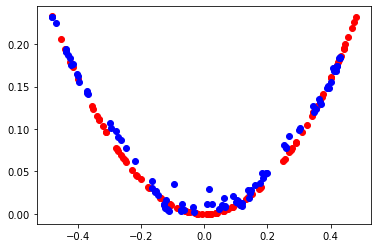

9501 0.3199999928474426 0.5899999737739563
9502 0.3100000023841858 0.6100000143051147
9503 0.3700000047683716 0.699999988079071
9504 0.36000001430511475 0.6299999952316284
9505 0.4399999976158142 0.699999988079071
9506 0.4000000059604645 0.6200000047683716
9507 0.3100000023841858 0.6200000047683716
9508 0.4099999964237213 0.6000000238418579
9509 0.4300000071525574 0.7099999785423279
9510 0.4699999988079071 0.6700000166893005
9511 0.44999998807907104 0.6600000262260437
9512 0.3700000047683716 0.5699999928474426
9513 0.3499999940395355 0.6299999952316284
9514 0.3400000035762787 0.6000000238418579
9515 0.4000000059604645 0.6399999856948853
9516 0.3799999952316284 0.6600000262260437
9517 0.3700000047683716 0.550000011920929
9518 0.3700000047683716 0.5799999833106995
9519 0.4000000059604645 0.6499999761581421
9520 0.3499999940395355 0.6499999761581421
9521 0.4099999964237213 0.6000000238418579
9522 0.4000000059604645 0.6000000238418579
9523 0.4099999964237213 0.6299999952316284
9524 0.43000

9693 0.6700000166893005 0.44999998807907104
9694 0.6499999761581421 0.3199999928474426
9695 0.7099999785423279 0.25
9696 0.6800000071525574 0.36000001430511475
9697 0.699999988079071 0.3100000023841858
9698 0.7200000286102295 0.27000001072883606
9699 0.7799999713897705 0.3100000023841858
9700 0.7599999904632568 0.3400000035762787
9701 0.7200000286102295 0.3799999952316284
9702 0.7300000190734863 0.25999999046325684
9703 0.7699999809265137 0.33000001311302185
9704 0.7099999785423279 0.30000001192092896
9705 0.7099999785423279 0.30000001192092896
9706 0.7300000190734863 0.30000001192092896
9707 0.6700000166893005 0.3700000047683716
9708 0.6899999976158142 0.23000000417232513
9709 0.699999988079071 0.4000000059604645
9710 0.7099999785423279 0.36000001430511475
9711 0.6100000143051147 0.36000001430511475
9712 0.7699999809265137 0.3199999928474426
9713 0.7200000286102295 0.30000001192092896
9714 0.7400000095367432 0.38999998569488525
9715 0.7200000286102295 0.3700000047683716
9716 0.8000000

9890 0.5600000023841858 0.5
9891 0.4699999988079071 0.47999998927116394
9892 0.46000000834465027 0.47999998927116394
9893 0.5099999904632568 0.5199999809265137
9894 0.5 0.5799999833106995
9895 0.5299999713897705 0.550000011920929
9896 0.5099999904632568 0.47999998927116394
9897 0.5099999904632568 0.4000000059604645
9898 0.5199999809265137 0.47999998927116394
9899 0.46000000834465027 0.5199999809265137
9900 0.5299999713897705 0.5099999904632568
9901 0.6000000238418579 0.49000000953674316
9902 0.5099999904632568 0.46000000834465027
9903 0.44999998807907104 0.5099999904632568
9904 0.5299999713897705 0.5299999713897705
9905 0.5299999713897705 0.5199999809265137
9906 0.4699999988079071 0.6000000238418579
9907 0.49000000953674316 0.5299999713897705
9908 0.6399999856948853 0.5299999713897705
9909 0.5600000023841858 0.4699999988079071
9910 0.5099999904632568 0.5099999904632568
9911 0.5 0.4399999976158142
9912 0.46000000834465027 0.4699999988079071
9913 0.4099999964237213 0.4399999976158142
991

In [4]:
gan.train()

### torch 版本

[[-1.         -0.89473684 -0.78947368 ...  0.78947368  0.89473684
   1.        ]
 [-1.         -0.89473684 -0.78947368 ...  0.78947368  0.89473684
   1.        ]
 [-1.         -0.89473684 -0.78947368 ...  0.78947368  0.89473684
   1.        ]
 ...
 [-1.         -0.89473684 -0.78947368 ...  0.78947368  0.89473684
   1.        ]
 [-1.         -0.89473684 -0.78947368 ...  0.78947368  0.89473684
   1.        ]
 [-1.         -0.89473684 -0.78947368 ...  0.78947368  0.89473684
   1.        ]]


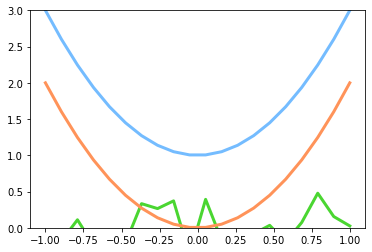

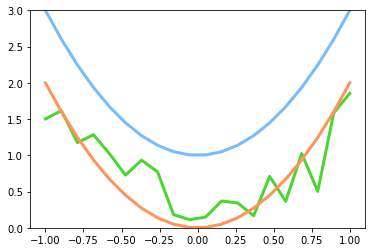

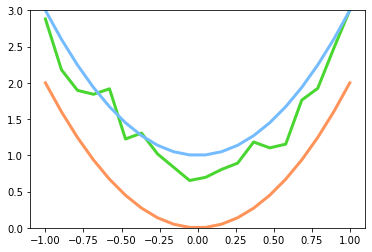

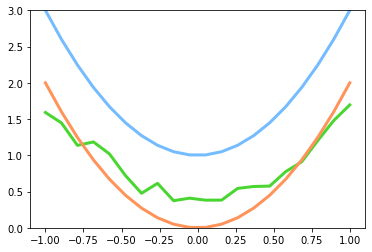

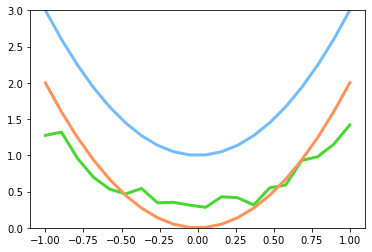

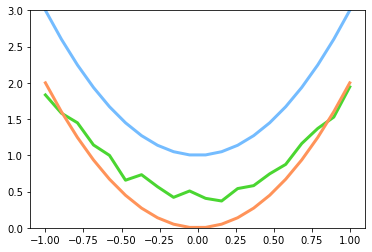

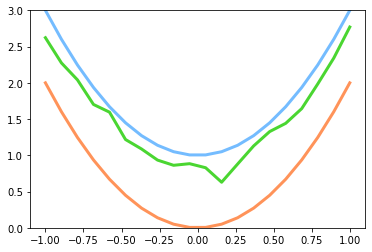

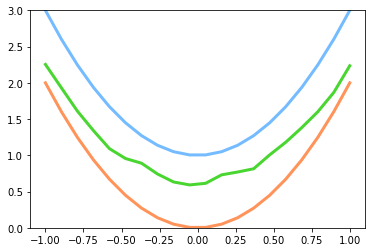

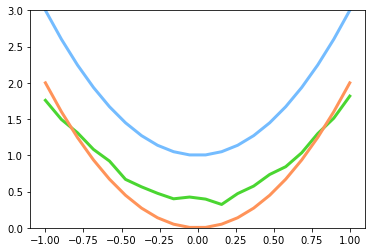

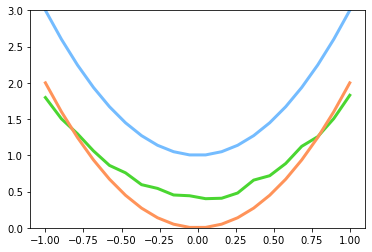

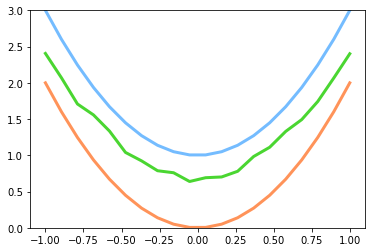

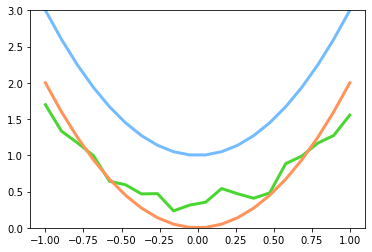

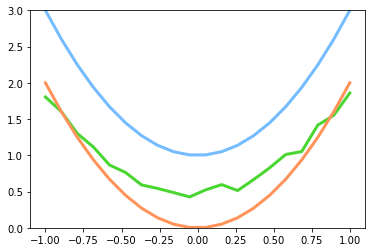

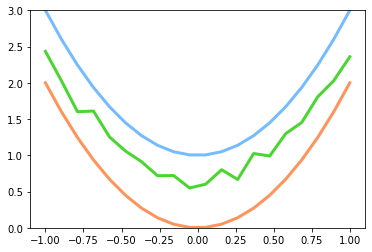

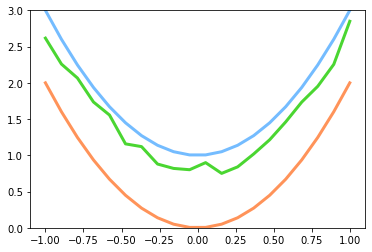

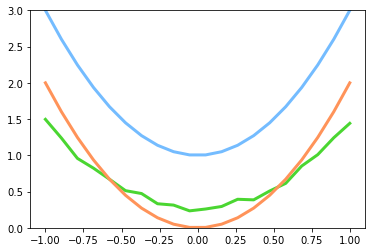

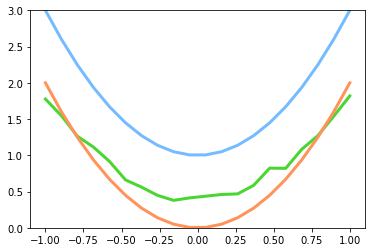

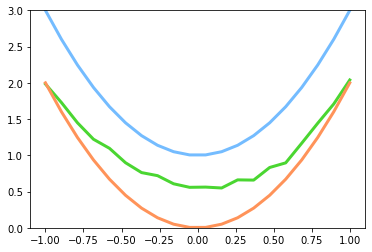

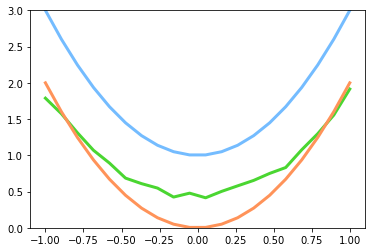

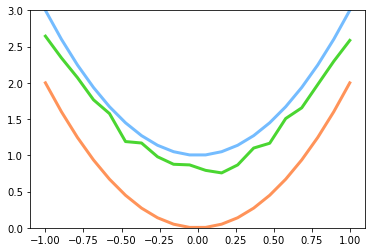

In [19]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



# 超参
BATCH_SIZE = 64
LR_G = 0.0001  # 学习率生成器
LR_D = 0.0001  # 学习率盘背鳍
N_IDEAS = 5  #  生成器噪声
ART_COMPONENTS = 20  # 总共点数
# 初始点
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])
print(PAINT_POINTS)
def artist_works():  # 真
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a - 1)
    paintings = torch.from_numpy(paintings).float()
    return paintings


G = nn.Sequential(  
    nn.Linear(N_IDEAS, 128),  
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),  
)

D = nn.Sequential( 
    nn.Linear(ART_COMPONENTS, 128),  
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),  
)

opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

plt.ion()  
for step in range(10000):
    artist_paintings = artist_works()  # 真
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)  # 随机假
    G_paintings = G(G_ideas)  # 画图
    prob_artist1 = D(G_paintings)  # 判别器弄他
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

    prob_artist0 = D(artist_paintings)  # 判别器增大真，减小假
    prob_artist1 = D(G_paintings.detach())  
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True) # 反向传播
    opt_D.step()

    if step % 500 == 0:  #画图
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting', )
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0],2 * np.power(PAINT_POINTS[0], 2) , c='#FF9359', lw=3, label='lower bound')
        plt.ylim((0, 3));
        plt.draw();
        plt.pause(0.01)

plt.ioff()
plt.show()
